In [320]:
#pip install python-edgar

import edgar
import pandas as pd
import seaborn as sns

#show your place, where u want store data
#it downloads quaterly data since pointed year
edgar.download_index('C:/Users/user/Desktop/Bek', 2021, skip_all_present_except_last=False)


***
### II.
Проведите анализ частотности форм за первый квартал 2021 года: 
    постройте таблицы как числа форм каждого конкретного типа, 
    так и числа компаний по которым подана хоть одна форма каждого типа. 
    По топ-10 наиболее популярным формам, 
    постройте графики этих величин в зависимости от дня квартала.
***
Answer: In this part I decided to use edgar module, which download us quaterly data. Quaterly data stored in this link below https://www.sec.gov/Archives/edgar/full-index/

In [308]:
# here reading stored data
data = pd.read_csv('C:/Users/user/Desktop/Bek/2021-QTR1.tsv', sep='|', lineterminator='\n', names=None)

In [309]:
#renaming columns
data.columns.values[0]='CIK'
data.columns.values[1]='Company Name'
data.columns.values[2]='FormType'
data.columns.values[3]='Date'
data.columns.values[4]='Txt'
data.columns.values[5]='Link'


In [310]:
#csv["Date"] = pd.to_datetime(csv["Date"])
data = data.sort_values(by="Date")
data.head(10)

,CIK,Company Name,FormType,Date,Txt,Link
156935,1616212,Trillium Therapeutics Inc.,3,2021-01-04,edgar/data/1616212/0001062993-21-000060.txt,edgar/data/1616212/0001062993-21-000060-index....
255558,1835289,White Steven Matthew,3,2021-01-04,edgar/data/1835289/0001493152-21-000125.txt,edgar/data/1835289/0001493152-21-000125-index....
227861,1791821,Kompella Uday,4,2021-01-04,edgar/data/1791821/0001192482-21-000024.txt,edgar/data/1791821/0001192482-21-000024-index....
227860,1791820,Musunuri Shankar,4,2021-01-04,edgar/data/1791820/0001192482-21-000022.txt,edgar/data/1791820/0001192482-21-000022-index....
49888,1196663,DUNCAN R FOSTER,4,2021-01-04,edgar/data/1196663/0001179110-21-000060.txt,edgar/data/1196663/0001179110-21-000060-index....
255566,1835315,Dyson Karen Elizabeth,4,2021-01-04,edgar/data/1835315/0001209191-21-000372.txt,edgar/data/1835315/0001209191-21-000372-index....
162843,1635154,SUTHERLAND JOHN W.,4,2021-01-04,edgar/data/1635154/0001209191-21-000430.txt,edgar/data/1635154/0001209191-21-000430-index....
255570,1835328,AIMS Asset Management Sdn Bhd,SC 13G,2021-01-04,edgar/data/1835328/0001835328-20-000001.txt,edgar/data/1835328/0001835328-20-000001-index....
255572,1835330,Etherington Robert Dee,3,2021-01-04,edgar/data/1835330/0001562180-21-000018.txt,edgar/data/1835330/0001562180-21-000018-index....
195122,1711754,"Inmune Bio, Inc.",8-K/A,2021-01-04,edgar/data/1711754/0001213900-21-000217.txt,edgar/data/1711754/0001213900-21-000217-index....


In [311]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
# quantity of companies which filled each type of form
data.groupby(['Company Name','FormType']).size().reset_index(name='Count')

,Company Name,FormType,Count
0,"01 Advisors 02, L.P.",D,1
1,"01 Carbon Capture, LP",D,1
2,"0X Fund I, a series of Kings County Ventures, LP",D,1
3,1 800 FLOWERS COM INC,10-Q,1
4,1 800 FLOWERS COM INC,4,11
...,...,...,...
144513,wang Xueyan,3,1
144514,williams craig a.,3,1
144515,williams craig a.,4,1
144516,woloshin michael,SC 13G,1


In [361]:
#showing a table number of each form type,
form_count = data.groupby("FormType")["FormType"].count().reset_index(name='Count')
form_count

,FormType,Count
0,1-A,94
1,1-A POS,88
2,1-A-W,14
3,1-A-W/A,1
4,1-A/A,187
...,...,...
327,TA-2/A,9
328,TA-W,6
329,UPLOAD,1384
330,X-17A-5,1757


In [332]:
#top 10 filled most frequency forms in first quater
f_10 =form_count.nlargest(10,'Count')
f_10

,FormType,Count
60,4,133902
304,SC 13G/A,27474
84,424B2,23001
113,8-K,18499
57,3,14645
245,NPORT-P,11804
303,SC 13G,11026
149,D,9384
26,13F-HR,5970
106,6-K,5862


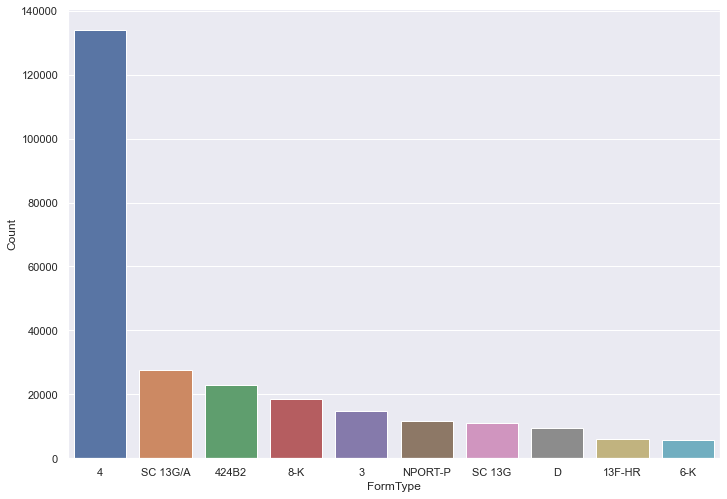

In [343]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x="FormType", y="Count", data=f_10);

In [389]:
# top 10 filled forms related to date of quater
date_in_quater = data.groupby(['Date','FormType']).size().reset_index(name='Count')
date_q = date_in_quater.nlargest(10, 'Count')
#date_q.sort_values(by='Date')
date_q

,Date,FormType,Count
134,2021-01-05,4,6615
4915,2021-03-03,4,5617
4792,2021-03-02,4,5462
3608,2021-02-16,SC 13G/A,5272
3210,2021-02-10,SC 13G/A,5160
238,2021-01-06,4,4089
3471,2021-02-12,SC 13G/A,4079
3641,2021-02-17,4,3832
3758,2021-02-18,4,3383
4655,2021-03-01,4,3361


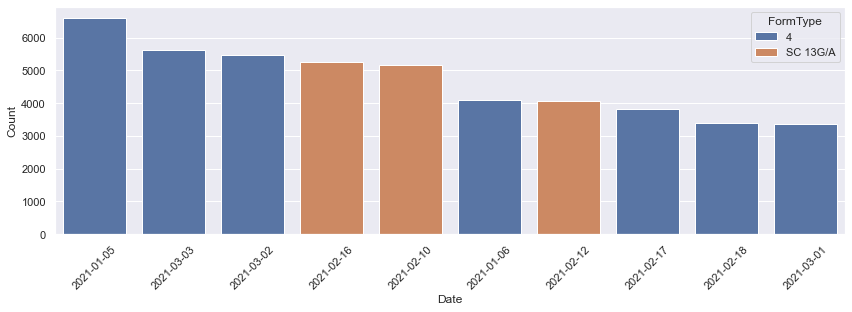

In [368]:
#plot of the data above
sns.barplot(x="Date", y="Count", hue="FormType", data=date_q,dodge=False);
plt.xticks(rotation=45)
plt.tight_layout()